<a href="https://colab.research.google.com/github/333CME/Challengue-TELECOM-X/blob/main/Proyecto_telecomx_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Extracción

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
datos_telecom=pd.read_json('/content/telecomx_data.json')
datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [161]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [162]:
#Ahora voy a eliminar, normalizar y concatener las columnas anidadas
datos_telecom = pd.concat([datos_telecom.drop(datos_telecom.columns[2:6], axis=1)] +
               [pd.json_normalize(datos_telecom[col]) for col in datos_telecom.columns[2:6]], axis=1)
datos_telecom.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [163]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


🔧 Transformación

In [164]:
valores_unicos = datos_telecom[['Churn']].drop_duplicates()  # DataFrame con valores únicos

In [165]:
# Eliminar filas con Churn vacío ("")
datos_telecom = datos_telecom[(datos_telecom['Churn'] != '')]
print(f"Filas restantes: {len(datos_telecom)}")  # Deberían ser 7267 - 213 = 7043

Filas restantes: 7043


In [166]:
# Eliminar las filas de Charges.Total vacío ("")
datos_telecom = datos_telecom[datos_telecom['Charges.Total'].str.strip() != ''].copy()
print(f"Filas restantes: {len(datos_telecom)}")

Filas restantes: 7032


In [167]:
datos_telecom.columns = datos_telecom.columns.str.lower()  # Cambio los Nombres de columnas en minúsculas

# Aplicar a todas las columnas de tipo 'object' (strings)
# Ahora cambio todos los textos a minúsculas:
for col in datos_telecom.select_dtypes(include='object'):
    datos_telecom[col] = datos_telecom[col].str.lower()

In [168]:
# Usando el módulo estándar re
import re
# Visto en clases: Elimina todo excepto alfanuméricos y espacios
def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = re.sub(r'[^a-zA-Z0-9]', '', texto)
    return texto

# Aplicar a columnas de texto
for col in datos_telecom.select_dtypes(include='object').columns:
    datos_telecom[col] = datos_telecom[col].apply(limpiar_texto)

In [169]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

In [170]:
#primero uso el código que me muestra lo que hay en las columnas
# CODIGO PARA REVISAR COLUMNAS

def analizar_columnas(df):
    # Lista de caracteres especiales a buscar
    caracteres_especiales = ['$', 'R$', '(', ')', '_', '-', '*', '/', '#']

    resultados = []
    for columna in df.columns:
        # Contar NaN/None
        n_nulos = df[columna].isna().sum()

        # Inicializar contadores para caracteres especiales
        contadores_caracteres = {caracter: 0 for caracter in caracteres_especiales}

        # Solo para columnas de texto
        if df[columna].dtype == object:
            # Contar espacios vacíos o strings con solo espacios
            n_espacios = df[columna].str.strip().eq('').sum()
            n_comas = df[columna].str.contains(',').sum()

            # Contar ocurrencias de cada carácter especial
            for caracter in caracteres_especiales:
                contadores_caracteres[caracter] = df[columna].astype(str).str.contains(
                    re.escape(caracter), regex=True, na=False).sum()
        else:
            n_espacios = 0
            n_comas = 0

        # Tipo de dato y valores únicos
        tipo_dato = df[columna].dtype
        ejemplos = df[columna].dropna().unique()[:3]  # Primeros 3 valores únicos

        # Crear entrada de resultados
        resultado_columna = {
            'Columna': columna,
            'Tipo_dato': tipo_dato,
            'NaN/None': n_nulos,
            'Espacios_vacíos': n_espacios,
            'Contiene_comas': n_comas,
            'Ejemplos': ejemplos
        }

        # Añadir contadores de caracteres especiales al resultado
        resultado_columna.update(contadores_caracteres)

        resultados.append(resultado_columna)

    return pd.DataFrame(resultados)

# Uso:
import re  # Necesario para re.escape

resultado_analisis = analizar_columnas(datos_telecom)
print(resultado_analisis)

             Columna Tipo_dato  NaN/None  Espacios_vacíos  Contiene_comas  \
0         customerid    object         0                0               0   
1              churn    object         0                0               0   
2             gender    object         0                0               0   
3      seniorcitizen     int64         0                0               0   
4            partner    object         0                0               0   
5         dependents    object         0                0               0   
6             tenure     int64         0                0               0   
7       phoneservice    object         0                0               0   
8      multiplelines    object         0                0               0   
9    internetservice    object         0                0               0   
10    onlinesecurity    object         0                0               0   
11      onlinebackup    object         0                0               0   

In [171]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

In [172]:
import pandas as pd
import numpy as np

# 1. Lista de columnas a convertir
columnas_a_convertir = [
    'churn', 'partner', 'dependents', 'phoneservice',
    'multiplelines', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport', 'streamingtv',
    'streamingmovies', 'paperlessbilling'
]

# 2. Función de normalización robusta
def normalizar_valor(valor):
    if pd.isna(valor):
        return np.nan
    valor_str = str(valor).lower().strip()
    if valor_str in ['yes', 'true', '1', 'si', 'sí']:
        return 'True'
    elif valor_str in ['no', 'false', '0', 'no internet service', 'no phone service']:
        return 'False'
    return valor_str  # Para diagnóstico

# 3. Proceso de conversión seguro
for col in columnas_a_convertir:
    if col in datos_telecom.columns:
        # Paso 1: Diagnóstico previo
        print(f"\n🔍 Valores únicos en {col} (ANTES):")
        print(datos_telecom[col].unique())

        # Paso 2: Normalización
        datos_telecom[col] = datos_telecom[col].apply(normalizar_valor)

        # Paso 3: Conversión final
        try:
            datos_telecom[col] = datos_telecom[col].replace({
                'True': True,
                'False': False
            }).astype('boolean')
            print(f"✅ {col} convertida a boolean")
        except Exception as e:
            print(f"❌ Error en {col}: {str(e)}")
            print("Valores problemáticos:", datos_telecom[col].unique())

# 4. Verificación final
print("\n📊 Resumen de tipos de datos:")
print(datos_telecom.dtypes)

print("\n🔍 Muestra de datos convertidos:")
display(datos_telecom.head(3))


🔍 Valores únicos en churn (ANTES):
['no' 'yes']
✅ churn convertida a boolean

🔍 Valores únicos en partner (ANTES):
['yes' 'no']
✅ partner convertida a boolean

🔍 Valores únicos en dependents (ANTES):
['yes' 'no']
✅ dependents convertida a boolean

🔍 Valores únicos en phoneservice (ANTES):
['yes' 'no']
✅ phoneservice convertida a boolean

🔍 Valores únicos en multiplelines (ANTES):
['no' 'yes' 'nophoneservice']
❌ Error en multiplelines: Need to pass bool-like values
Valores problemáticos: ['False' 'True' 'nophoneservice']

🔍 Valores únicos en onlinesecurity (ANTES):
['no' 'yes' 'nointernetservice']
❌ Error en onlinesecurity: Need to pass bool-like values
Valores problemáticos: ['False' 'True' 'nointernetservice']

🔍 Valores únicos en onlinebackup (ANTES):
['yes' 'no' 'nointernetservice']
❌ Error en onlinebackup: Need to pass bool-like values
Valores problemáticos: ['True' 'False' 'nointernetservice']

🔍 Valores únicos en deviceprotection (ANTES):
['no' 'yes' 'nointernetservice']
❌ Error

<ipython-input-172-638920661>:35: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002orfbo,False,female,0,True,True,9,True,False,dsl,...,True,False,True,True,False,oneyear,True,mailedcheck,65.6,5933
1,0003mknfe,False,male,0,False,False,9,True,True,dsl,...,False,False,False,False,True,monthtomonth,False,mailedcheck,59.9,5424
2,0004tlhlj,True,male,0,False,False,4,True,False,fiberoptic,...,False,True,False,False,False,monthtomonth,True,electroniccheck,73.9,28085


In [173]:
print("\n🔍 Valores no booleanos detectados:")
for col in columnas_a_convertir:
    if col in datos_telecom.columns:
        unique_values = datos_telecom[col].dropna().unique()
        if not all(isinstance(x, (bool, np.bool_)) for x in unique_values):
            print(f"\nColumna {col} contiene:")
            print(unique_values)


🔍 Valores no booleanos detectados:

Columna multiplelines contiene:
['False' 'True' 'nophoneservice']

Columna onlinesecurity contiene:
['False' 'True' 'nointernetservice']

Columna onlinebackup contiene:
['True' 'False' 'nointernetservice']

Columna deviceprotection contiene:
['False' 'True' 'nointernetservice']

Columna techsupport contiene:
['True' 'False' 'nointernetservice']

Columna streamingtv contiene:
['True' 'False' 'nointernetservice']

Columna streamingmovies contiene:
['False' 'True' 'nointernetservice']


In [174]:
##Nuevamente uso el código que me muestra lo que hay en las columnas
# CODIGO PARA REVISAR COLUMNAS

def analizar_columnas(df):
    # Lista de caracteres especiales a buscar
    caracteres_especiales = ['$', 'R$', '(', ')', '_', '-', '*', '/', '#']

    resultados = []
    for columna in df.columns:
        # Contar NaN/None
        n_nulos = df[columna].isna().sum()

        # Inicializar contadores para caracteres especiales
        contadores_caracteres = {caracter: 0 for caracter in caracteres_especiales}


            # Contar ocurrencias de cada carácter especial
        for caracter in caracteres_especiales:
                contadores_caracteres[caracter] = df[columna].astype(str).str.contains(
                    re.escape(caracter), regex=True, na=False).sum()
        else:
            n_espacios = 0
            n_comas = 0

        # Tipo de dato y valores únicos
        tipo_dato = df[columna].dtype
        ejemplos = df[columna].dropna().unique()[:3]  # Primeros 3 valores únicos

        # Crear entrada de resultados
        resultado_columna = {
            'Columna': columna,
            'Tipo_dato': tipo_dato,
            'NaN/None': n_nulos,
            'Espacios_vacíos': n_espacios,
            'Contiene_comas': n_comas,
            'Ejemplos': ejemplos
        }

        # Añadir contadores de caracteres especiales al resultado
        resultado_columna.update(contadores_caracteres)

        resultados.append(resultado_columna)

    return pd.DataFrame(resultados)

# Uso:
import re  # Necesario para re.escape

resultado_analisis = analizar_columnas(datos_telecom)
print(resultado_analisis)

             Columna Tipo_dato  NaN/None  Espacios_vacíos  Contiene_comas  \
0         customerid    object         0                0               0   
1              churn   boolean         0                0               0   
2             gender    object         0                0               0   
3      seniorcitizen     int64         0                0               0   
4            partner   boolean         0                0               0   
5         dependents   boolean         0                0               0   
6             tenure     int64         0                0               0   
7       phoneservice   boolean         0                0               0   
8      multiplelines    object         0                0               0   
9    internetservice    object         0                0               0   
10    onlinesecurity    object         0                0               0   
11      onlinebackup    object         0                0               0   

In [175]:
#Convertir de Charges.Total a numérico
# Me aseguro eliminando espacios y despúés convierto a float
datos_telecom['charges.total'] = datos_telecom['charges.total'].str.replace(' ', '').astype(float)

In [176]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   boolean
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   boolean
 5   dependents        7032 non-null   boolean
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   boolean
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

In [177]:
#finalmente pasaré a string:
# Lista de columnas a convertir a string
columnas_a_string = ['internetservice', 'contract', 'paymentmethod', 'gender', 'customerid']

# Aplicar conversión (incluso si ya son strings)
for col in columnas_a_string:
    datos_telecom[col] = datos_telecom[col].astype('string')

# Verificar cambios
print("\nTipos de datos actualizados:")
print(datos_telecom[columnas_a_string].dtypes)


Tipos de datos actualizados:
internetservice    string[python]
contract           string[python]
paymentmethod      string[python]
gender             string[python]
customerid         string[python]
dtype: object


In [178]:
#verificación final de la transformación
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   string 
 1   churn             7032 non-null   boolean
 2   gender            7032 non-null   string 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   boolean
 5   dependents        7032 non-null   boolean
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   boolean
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   string 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   string 
 17  

📊 ETAPA DE CARGA Y ANÁLISIS

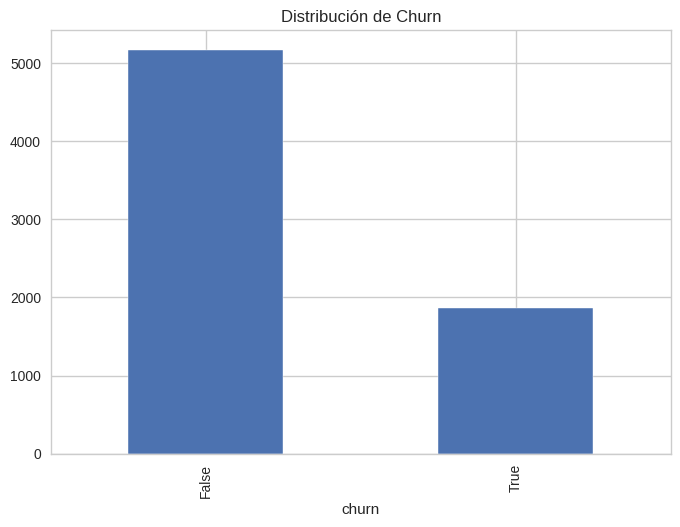

In [179]:
import matplotlib.pyplot as plt
# revisar primnero la distribución de Churn (evasión)
datos_telecom['churn'].value_counts().plot(kind='bar', title='Distribución de Churn')
plt.show()

In [180]:
#Ahora a crear ala columna cuentas diarias
import numpy as np

# Suponiendo 30 días por mes
datos_telecom['cuentas_diarias'] = datos_telecom['charges.monthly'] / 30

# Opción: Redondear a 2 decimales
datos_telecom['cuentas_diarias'] = datos_telecom['cuentas_diarias'].round(2)

# Verificación
print(datos_telecom[['charges.monthly', 'cuentas_diarias']].head())

   charges.monthly  cuentas_diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80


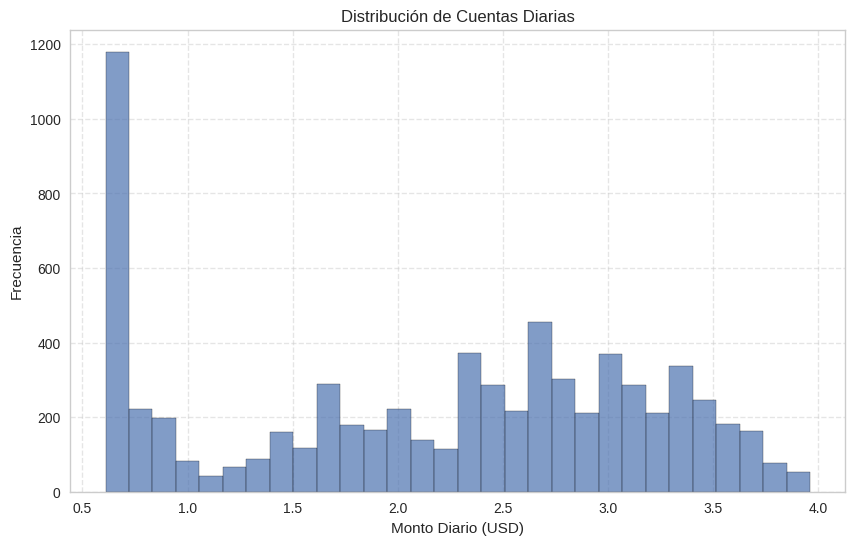

In [181]:
## para visualizar los datos
# crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.hist(datos_telecom['cuentas_diarias'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de Cuentas Diarias')
plt.xlabel('Monto Diario (USD)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


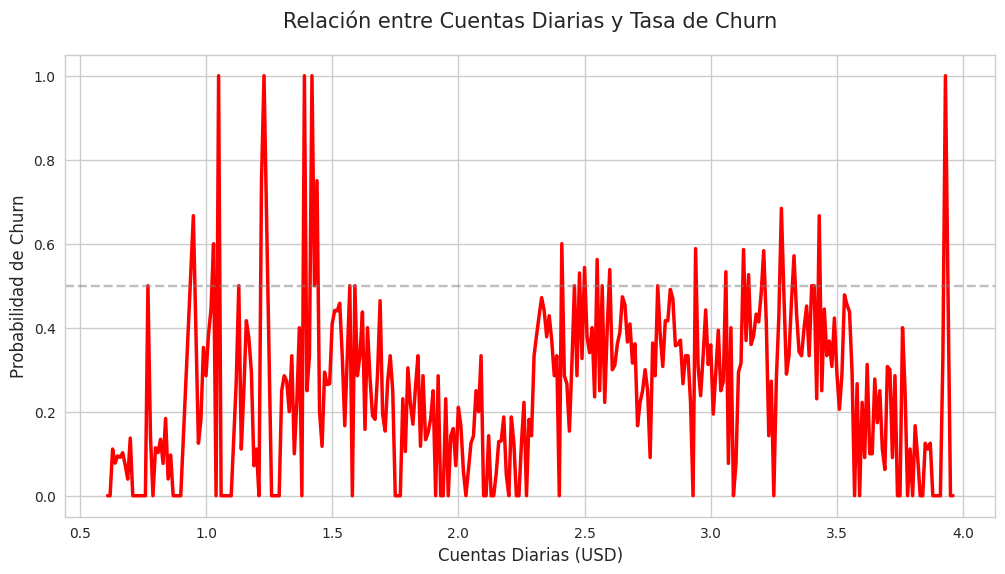

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Para crear el gráfico de línea
sns.lineplot(
    data=datos_telecom,
    x='cuentas_diarias',
    y='churn',
    estimator='mean',  # Promedio de Churn por valor diario
    errorbar=None,     # Sin barras de error para evitar la saturación
    color='red',
    linewidth=2.5
)

plt.title('Relación entre Cuentas Diarias y Tasa de Churn', fontsize=15, pad=20)
plt.xlabel('Cuentas Diarias (USD)', fontsize=12)
plt.ylabel('Probabilidad de Churn', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Para mejorar el análisis visual crear una línea horizontal de referencia
# representa el 50% de probabilidad
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

plt.show()


#Picos altos: Valores de cuentas_diarias donde la línea roja sube son "zonas de riesgo" (clientes con mayor probabilidad de abandonar).
#Picos bajos: Valores donde la línea baja indican clientes más leales.

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd


# Crear un DataFrame agregado para el gráfico (promedio de churn por cuentas_diarias)
df_agregado = datos_telecom.groupby('cuentas_diarias', as_index=False)['churn'].mean()

# Crear gráfico interactivo con Plotly
fig = px.line(
    df_agregado,
    x='cuentas_diarias',
    y='churn',
    labels={'cuentas_diarias': 'Cuentas Diarias (USD)', 'churn': 'Probabilidad de Churn'},
    title='Relación entre Cuentas Diarias y Tasa de Churn (Interactivo)',
    template='plotly_white',  # Similar a 'whitegrid' de Seaborn
    line_shape='linear'       # Mantiene el estilo de línea recta
)

# Añadir línea de referencia en y=0.5 (equivalente a plt.axhline)
fig.add_hline(
    y=0.5,
    line_dash="dash",
    line_color="gray",
    opacity=0.5,
    annotation_text="Límite de referencia",
    annotation_position="bottom right"
)

# Ajustar estilo para que se parezca al gráfico original
fig.update_layout(
    font=dict(size=12),
    xaxis=dict(tickvals=np.arange(0.2, df_agregado['cuentas_diarias'].max() + 0.2, 0.2)),
    yaxis=dict(title='Probabilidad de Churn', range=[0, 1]),
    hovermode="x unified"  # Muestra tooltips al pasar el cursor
)

# Mostrar el gráfico
fig.show()

In [184]:
# Lista de columnas categóricas a analizar
columnas_categoricas = ['gender', 'contract', 'paymentmethod', 'internetservice']

<ipython-input-185-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-185-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-185-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-185-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




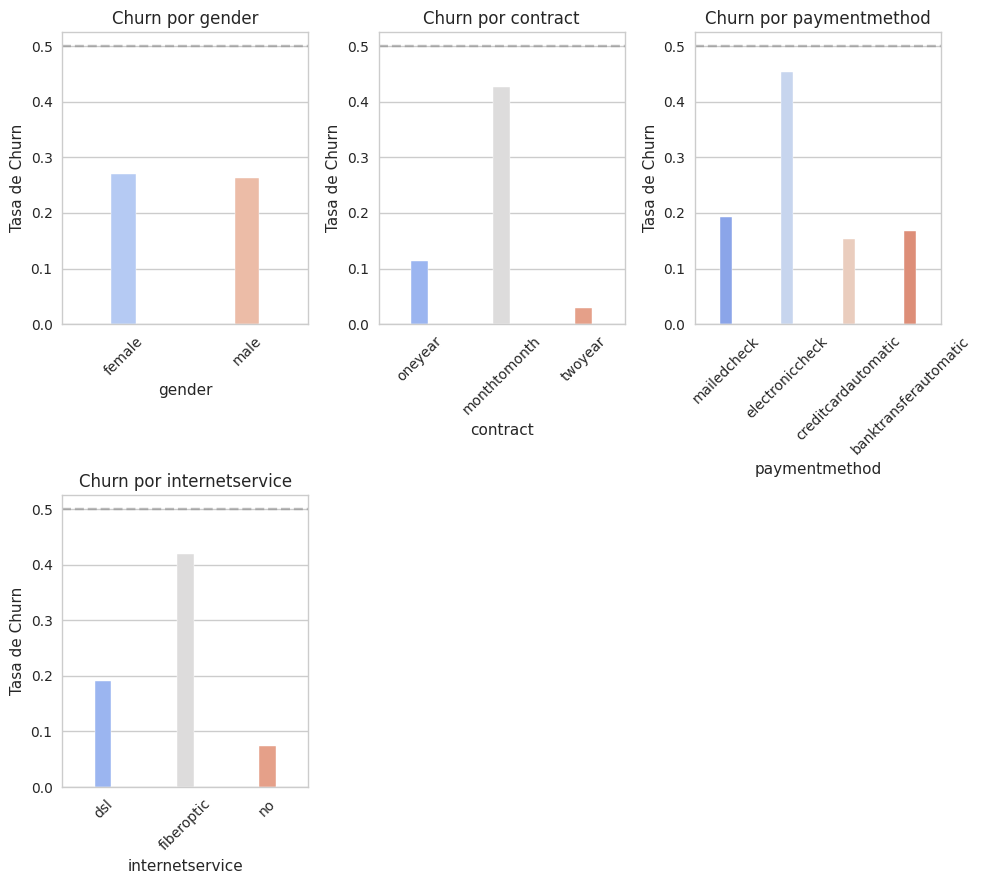

In [185]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd

#gráfico de barras apiladas
plt.figure(figsize=(10, 9))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(2, 3, i)
    sns.barplot(
        data=datos_telecom,
        x=col,
        y='churn',
        estimator='mean',
        errorbar=None,
        palette='coolwarm',
        width=0.2
    )
    plt.title(f'Churn por {col}')
    plt.ylabel('Tasa de Churn')
    plt.xticks(rotation=45)
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)  # Línea de referencia

plt.tight_layout()
plt.show()

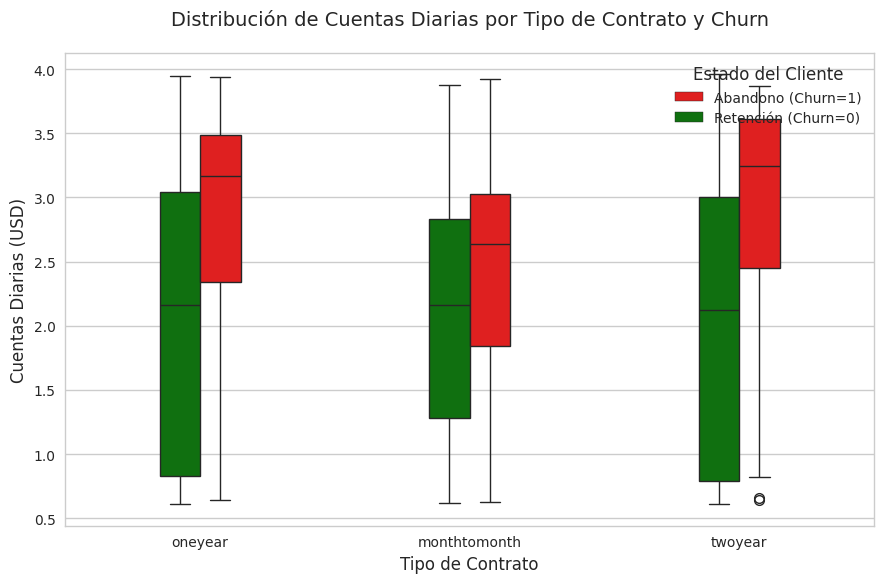

In [186]:
# distribucion de cuentas diaras vs churn
import plotly.express as px

plt.figure(figsize=(9, 6))

# Boxplot con colores y ancho ajustado
sns.boxplot(
    data=datos_telecom,
    x='contract',
    y='cuentas_diarias',
    hue='churn',
    palette={1: 'red', 0: 'green'},  # 1=Rojo (Abandono), 0=Verde (Retención)
    width=0.3
)

# Leyenda personalizada
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=[handles[1], handles[0]],
    labels=['Abandono (Churn=1)', 'Retención (Churn=0)'],
    title='Estado del Cliente',
    loc='upper right',
    facecolor='white'
)

plt.title('Distribución de Cuentas Diarias por Tipo de Contrato y Churn', fontsize=14, pad=20)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cuentas Diarias (USD)', fontsize=12)

plt.tight_layout()
plt.show()

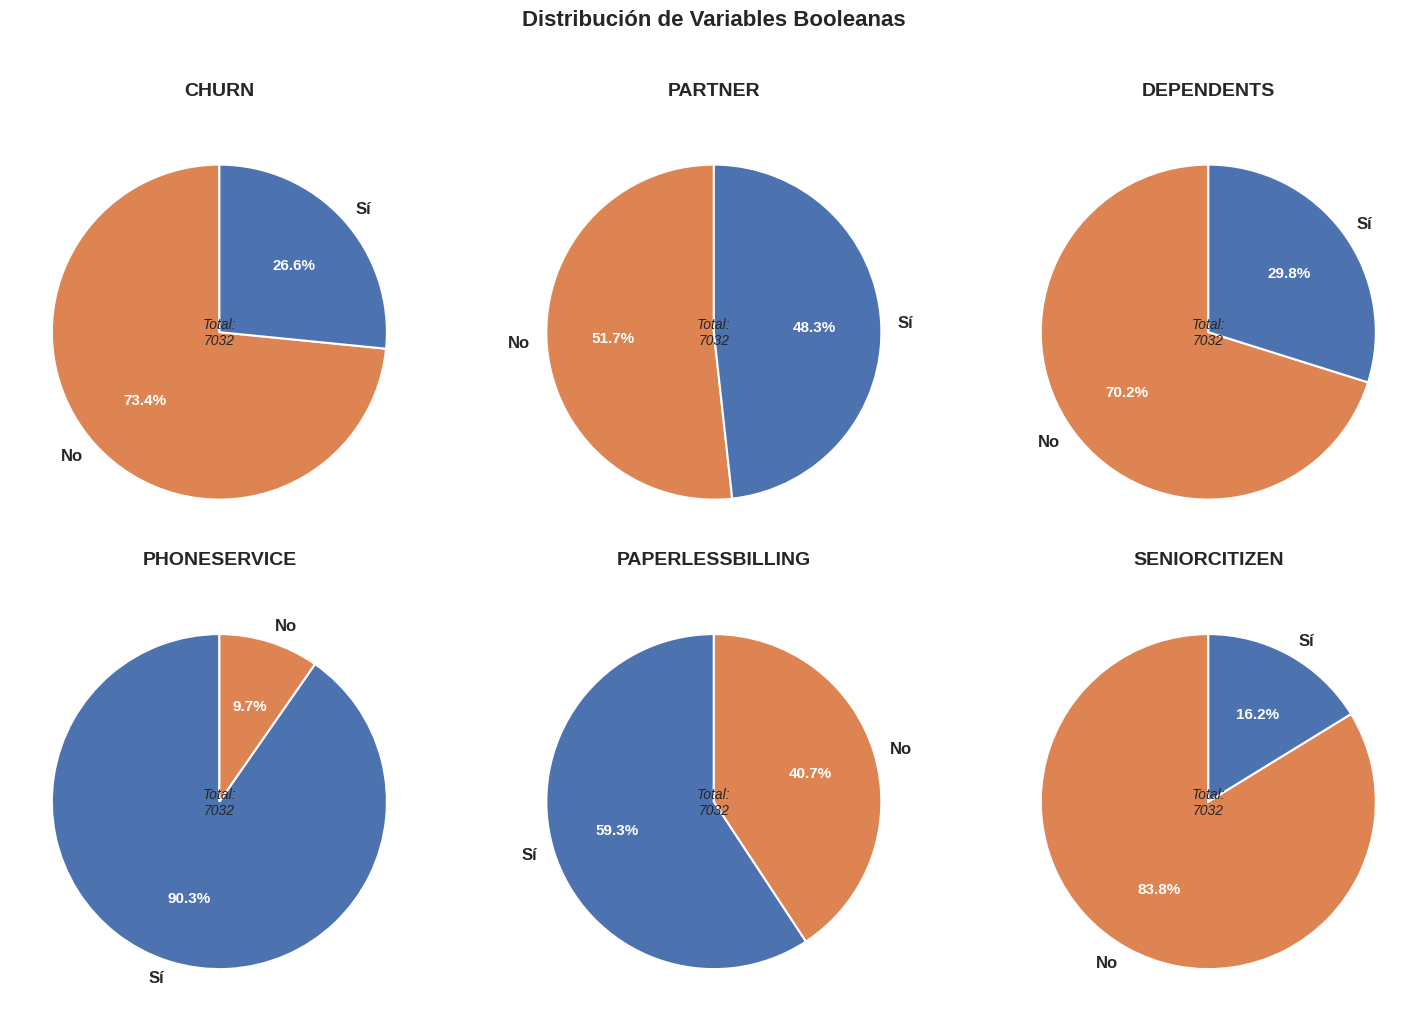

In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 12

# Columnas booleanas a visualizar (ajusta según tu DataFrame)
columnas_booleanas = ['churn', 'partner', 'dependents', 'phoneservice',
                     'paperlessbilling', 'seniorcitizen']

# Configurar figura
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de Variables Booleanas', y=1.02, fontsize=16, fontweight='bold')

# Paleta de colores contrastantes (Sí/No)
colores = {'Sí': '#4C72B0', 'No': '#DD8452'}  # Azul y naranja contrastantes

# Crear un gráfico por cada variable booleana
for ax, col in zip(axs.flatten(), columnas_booleanas):
    if col in datos_telecom.columns:
        # Contar valores y calcular porcentajes
        counts = datos_telecom[col].value_counts()
        porcentajes = counts / counts.sum() * 100
        labels = ['Sí' if x else 'No' for x in counts.index]

        # Crear gráfico de torta
        wedges, texts, autotexts = ax.pie(
            counts,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=[colores[label] for label in labels],
            wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
            textprops={'fontsize': 12, 'fontweight': 'bold'}
        )

        # Añadir título
        ax.set_title(col.upper(), pad=20, fontsize=14, fontweight='bold')

        # Mejorar las etiquetas de porcentaje
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(11)

        # Añadir recuento absoluto en el centro
        ax.text(0, 0, f"Total:\n{counts.sum()}",
                ha='center', va='center',
                fontsize=10, fontstyle='italic')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()